In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.datasets.samples_generator import make_regression
from matplotlib import pyplot as plt

In [4]:
x, y = make_regression(n_samples=200, n_features=4, noise=20, random_state=1)

print(x.shape, y.shape)

(200, 4) (200,)


In [9]:

# x = (m, n) | y = (m, 1), t = (1, n), where n = features and m = features
def hyp(x, theta):
    assert x.shape[1] == theta.shape[1], "Shape x and theta different"
    return x.dot(theta.T)

def cost(x, y, theta):
    m = x.shape[0]
    x_0 = np.ones((m, 1))
    h_of_x = hyp(x, theta)
    return 1/(2 * m) * (h_of_x - y).sum() ** 2

def LinReg(x, y, theta, alpha=0.1, n_iters=400):
    m = x.shape[0]
    n = x.shape[1]
    y = y.reshape((y.shape[0], 1))
    X = np.concatenate((np.ones((m, 1)), x), axis=1)
    assert X.shape[0] == y.shape[0], "X and y should have same no of samples"
    assert theta.shape[1] == X.shape[1], "Theta should have the same size as the number of features"
    costs = np.zeros(n_iters)
    
    
    for i in range(n_iters):
        h_of_x = hyp(X, theta)
        assert h_of_x.shape == y.shape, "H of x and y should be of the same shape"
        error = alpha * (1/m * np.sum((h_of_x - y) * X, axis=0))
        theta = theta - error
        costs[i] = cost(X, y, theta)
    return theta, costs

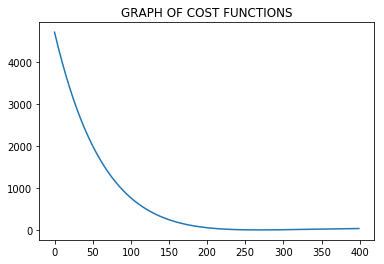

Theta  [[ 3.03894253 19.54503694 59.27091355 43.94826512 60.7894726 ]]  Costs [4.70893934e+03 4.63262200e+03 4.55741583e+03 4.48330597e+03
 4.41027773e+03 4.33831663e+03 4.26740834e+03 4.19753874e+03
 4.12869388e+03 4.06085997e+03 3.99402341e+03 3.92817078e+03
 3.86328881e+03 3.79936440e+03 3.73638464e+03 3.67433675e+03
 3.61320813e+03 3.55298633e+03 3.49365909e+03 3.43521425e+03
 3.37763986e+03 3.32092408e+03 3.26505525e+03 3.21002183e+03
 3.15581246e+03 3.10241590e+03 3.04982105e+03 2.99801698e+03
 2.94699287e+03 2.89673806e+03 2.84724200e+03 2.79849431e+03
 2.75048471e+03 2.70320307e+03 2.65663938e+03 2.61078377e+03
 2.56562649e+03 2.52115791e+03 2.47736854e+03 2.43424898e+03
 2.39178999e+03 2.34998242e+03 2.30881726e+03 2.26828559e+03
 2.22837863e+03 2.18908770e+03 2.15040423e+03 2.11231977e+03
 2.07482597e+03 2.03791460e+03 2.00157752e+03 1.96580671e+03
 1.93059425e+03 1.89593231e+03 1.86181319e+03 1.82822926e+03
 1.79517301e+03 1.76263702e+03 1.73061395e+03 1.69909659e+03
 1.6680

In [16]:
theta = np.zeros((1, x.shape[1] + 1))

t, costs = LinReg(x, y, theta, 0.005)

plt.plot(costs)
plt.title("GRAPH OF COST FUNCTIONS")
plt.show()
print("Theta ", t, " Costs", costs)